In [3]:
#to add a new row to existing array
import numpy as np
arr = np.array([[1,2,3],[45,4,7],[9,6,10]])
print("\n",arr)
na = np.array([12,23,45])
new_arr = np.r_[arr,[na]]
print("\n",new_arr)


 [[ 1  2  3]
 [45  4  7]
 [ 9  6 10]]

 [[ 1  2  3]
 [45  4  7]
 [ 9  6 10]
 [12 23 45]]


In [6]:
#frequency of all elements in series
import pandas as pd
se = pd.Series([1,1,1,2,2,2,2,3,3,3,4,4,5])
np.unique(se, return_counts=True)

(array([1, 2, 3, 4, 5], dtype=int64), array([3, 4, 3, 2, 1], dtype=int64))

In [7]:
df = pd.DataFrame(np.random.randn(5,4), ['A','B','C','D','E'],['w','x','y','z'])
print(df)
print("\n",df['w']) #-->to access specific column
print("\n",df.loc['A']) #-->to access specific row

          w         x         y         z
A  0.513801  0.355790 -1.515912 -0.269797
B -1.013618 -2.232067  1.652881 -0.411373
C -0.545195 -0.075933  0.734729 -1.001389
D -0.931465  0.635205  0.620569  0.833977
E  0.339992 -0.580827  0.495569  1.228693

 A    0.513801
B   -1.013618
C   -0.545195
D   -0.931465
E    0.339992
Name: w, dtype: float64

 w    0.513801
x    0.355790
y   -1.515912
z   -0.269797
Name: A, dtype: float64


In [8]:
#to access multiple columns
df.loc[['A','C']]

,w,x,y,z
A,0.513801,0.355790,-1.515912,-0.269797
C,-0.545195,-0.075933,0.734729,-1.001389


In [9]:
#to access rows based on index position
df.iloc[3] #--> 3 is index value

w   -0.931465
x    0.635205
y    0.620569
z    0.833977
Name: D, dtype: float64

In [10]:
#to get specific value of co-ordinate in dataframe
df.loc['B','y'] #Syntax --> df.loc[row,column]

1.6528806569561914

In [11]:
#to get multiple co-ordinates
df.loc[['A','B'],['w','z']] #df.loc[[rows],[columns]]

,w,z
A,0.513801,-0.269797
B,-1.013618,-0.411373


In [12]:
#retrieving the data based on condition
print(df[df>0]) #Nan for false
print("\n",df[df['w']>0])

          w         x         y         z
A  0.513801  0.355790       NaN       NaN
B       NaN       NaN  1.652881       NaN
C       NaN       NaN  0.734729       NaN
D       NaN  0.635205  0.620569  0.833977
E  0.339992       NaN  0.495569  1.228693

           w         x         y         z
A  0.513801  0.355790 -1.515912 -0.269797
E  0.339992 -0.580827  0.495569  1.228693


In [13]:
#to convert dictionary to dataframe
d = {"A": [1,2,np.nan], "B": [5,np.nan,np.nan], "C": [1,2,3], "D": [np.nan,np.nan,np.nan]}
df1 = pd.DataFrame(d)
df1

,A,B,C,D
0,1.0,5.0,1,NaN
1,2.0,NaN,2,NaN
2,NaN,NaN,3,NaN


In [14]:
#to drop values with Nan
#dropna(how, thresh, axis, inplace)
print(df1.dropna())
#how="all" or "any"
print("\n",df1.dropna(how="all")) #It will be checking the rows with all
print("\n",df1.dropna(how="any")) #It will delete the rows which have single Nan value

Empty DataFrame
Columns: [A, B, C, D]
Index: []

      A    B  C   D
0  1.0  5.0  1 NaN
1  2.0  NaN  2 NaN
2  NaN  NaN  3 NaN

 Empty DataFrame
Columns: [A, B, C, D]
Index: []


In [15]:
df1.dropna(how="all",axis=1)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [16]:
#to check the sum of Nan values in each column
df1.isna().sum()

A    1
B    2
C    0
D    3
dtype: int64

In [17]:
#thresh
print(df1.dropna(thresh=2,axis=1))

     A  C
0  1.0  1
1  2.0  2
2  NaN  3


In [18]:
#fillna()
df1.fillna(value=0.0)

,A,B,C,D
0,1.0,5.0,1,0.0
1,2.0,0.0,2,0.0
2,0.0,0.0,3,0.0


In [19]:
df1['A'].fillna(value=df1['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [20]:
# Group by
# To group based on column and perform aggregate functions
data = {'company': ['Google','Google','Meta','Meta','Fb','Fb'], 
        'person': ['sam','mani','sai','prasanth','mohan','mounika'], 
        'sales': [300, 500, 100, 200, 600, 20]}
df2 = pd.DataFrame(data)
df2

,company,person,sales
0,Google,sam,300
1,Google,mani,500
2,Meta,sai,100
3,Meta,prasanth,200
4,Fb,mohan,600
5,Fb,mounika,20


In [21]:
bycomp = df2.groupby('company')
bycomp
bycomp.sum()['sales']
bycomp.value_counts()
bycomp['company'].value_counts()

company
Fb        2
Google    2
Meta      2
Name: count, dtype: int64

In [86]:
# To get the maximum salary person from each company
df2.loc[bycomp['sales'].idxmax()][['person','sales']]

,person,sales
4,mohan,600
1,mani,500
3,prasanth,200


In [22]:
bycomp.describe()

sales                                                      
        count   mean         std    min    25%    50%    75%    max
company                                                            
Fb        2.0  310.0  410.121933   20.0  165.0  310.0  455.0  600.0
Google    2.0  400.0  141.421356  300.0  350.0  400.0  450.0  500.0
Meta      2.0  150.0   70.710678  100.0  125.0  150.0  175.0  200.0

In [23]:
# to access a csv_file
dp = pd.read_csv("samplecsv.csv")
dp.head() #to get first 5 rows

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2020,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,"733,258",ANZSIC06 divisions A-S (excluding classes K633...
1,2020,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,"660,630",ANZSIC06 divisions A-S (excluding classes K633...
2,2020,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"54,342",ANZSIC06 divisions A-S (excluding classes K633...
3,2020,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"18,285",ANZSIC06 divisions A-S (excluding classes K633...
4,2020,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,872",ANZSIC06 divisions A-S (excluding classes K633...


In [24]:
# To access a xlsx_file
dp1 = pd.ExcelFile("sample.xlsx")
dr1 = dp1.parse('Sheet1')
dr1.tail() #to get last five rows

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014
699,Channel Partners,United States of America,VTT,High,1806.0,250,12,21672.0,3250.80,18421.20,5418.0,13003.20,2014-05-01,5,May,2014


In [25]:
# to access a csv_file
dp = pd.read_csv("delimatercsv.csv", sep=';', names=['sid','ages','places'])
dp.drop(0) #to delete a row

,sid,ages,places
1,Alice,25,New York
2,Bob,30,San Francisco
3,Charlie,22,Los Angeles


In [27]:
# to access a csv_file
df_titanic = pd.read_csv("titanic_train.csv")
df_titanic.columns
df_titanic.head()
df_titanic['Pclass'].unique()
df_titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [28]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
#Sum of Nan's
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
df_titanic.isna().sum()*100/len(df_titanic)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [32]:
#To drop a column
df_titanic.drop(['Cabin'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [35]:
#To find number of people dead
len(df_titanic)-df_titanic['Survived'].sum()

549

In [6]:
#MATHPLOTLIB
#It is mostly used for data visualization library.Whi was inspired by MATLAB
# It is used for data visualization in the form of various plots
import matplotlib.pyplot as plt

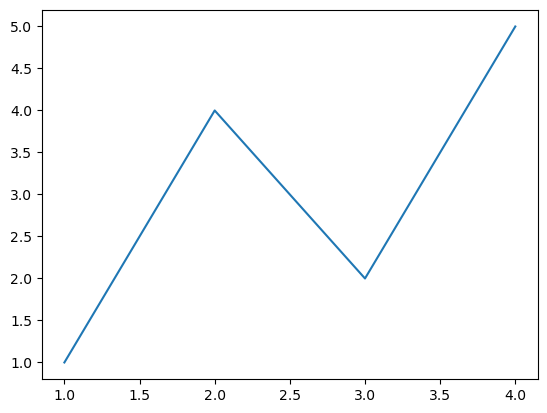

In [45]:
x=[1,2,3,4]
y=[1,4,2,5]
plt.figure()
plt.plot(x,y)

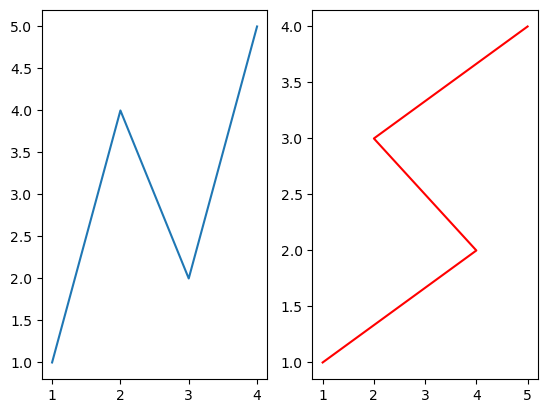

In [55]:
plt.subplot(1,2,1)
plt.plot(x,y)
plt.subplot(1,2,2)
plt.plot(y,x,'r')

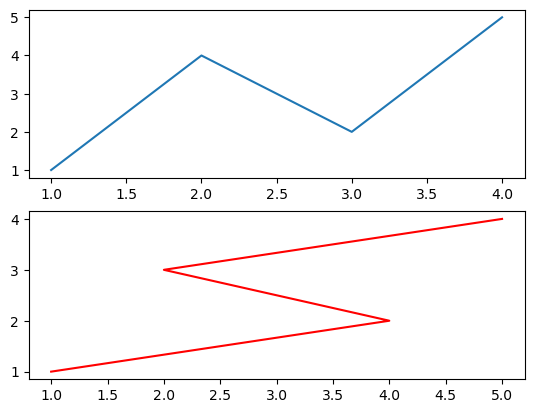

In [56]:
plt.subplot(2,1,1)
plt.plot(x,y)
plt.subplot(2,1,2)
plt.plot(y,x,'r')

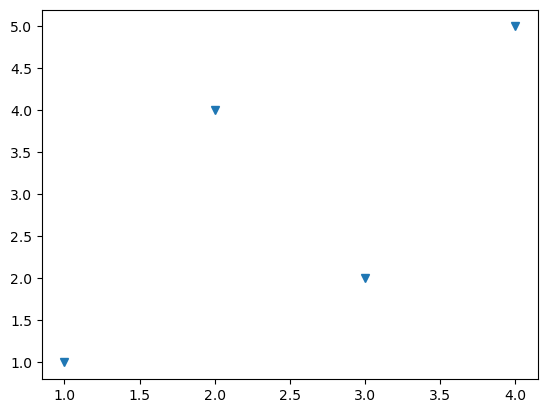

In [51]:
plt.plot(x,y,'v')

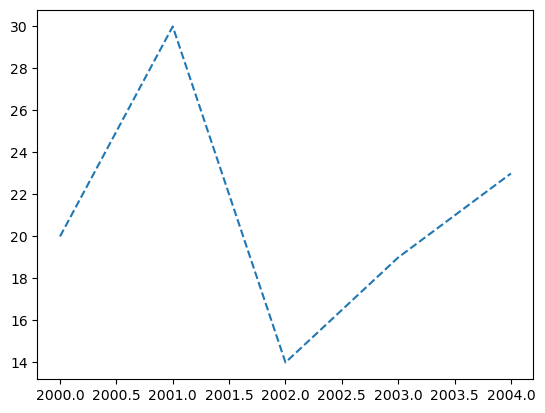

In [69]:
years=np.arange(2000,2005,dtype=int)
y_innova = np.array([20,30,14,19,23])
years,y_innova
plt.plot(years,y_innova,'--')

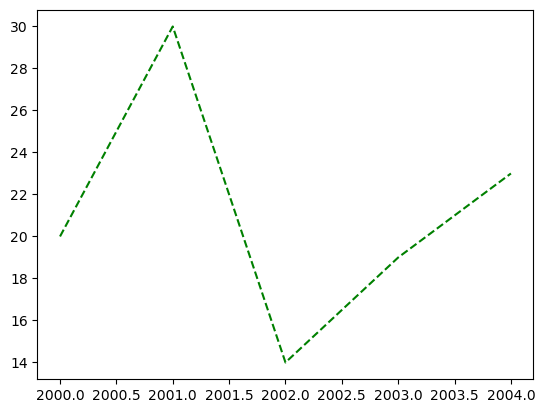

In [68]:
years=np.arange(2000,2005,dtype=int)
y_innova = np.array([20,30,14,19,23])
years,y_innova
plt.plot(years,y_innova,'--g')

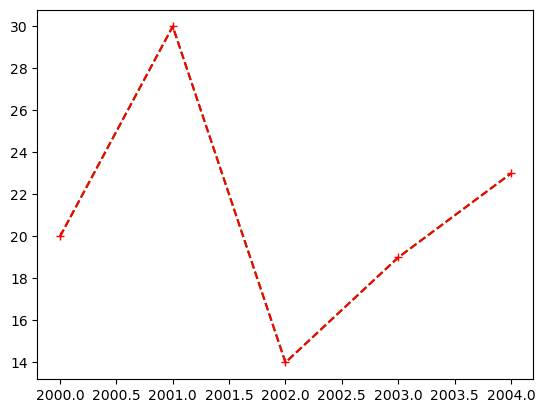

In [70]:
years=np.arange(2000,2005,dtype=int)
y_innova = np.array([20,30,14,19,23])
years,y_innova
plt.plot(years,y_innova,'--g')
plt.plot(years,y_innova,'--+r')

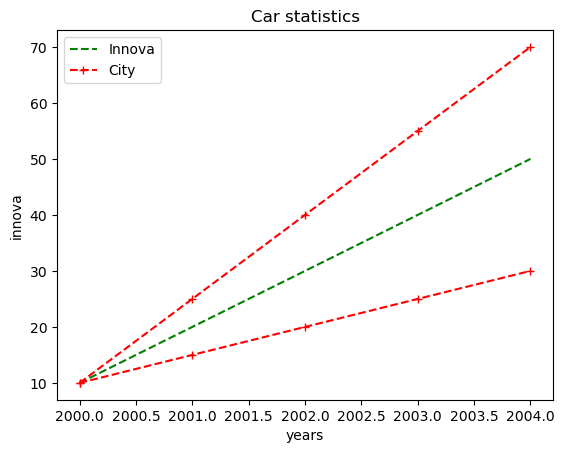

In [76]:
years=np.arange(2000,2005,dtype=int)
y_innova = np.array([10,20,30,40,50])
honda=np.array([10,15,20,25,30])
kia=np.array([10,25,40,55,70])
years,y_innova
plt.plot(years,y_innova,'--g')
plt.plot(years,honda,'--+r')
plt.plot(years,kia,'--+r')
plt.title('Car statistics')
plt.xlabel('years')
plt.ylabel('innova')
plt.legend(['Innova','City'])

Text(0, 0.5, 'Sales')

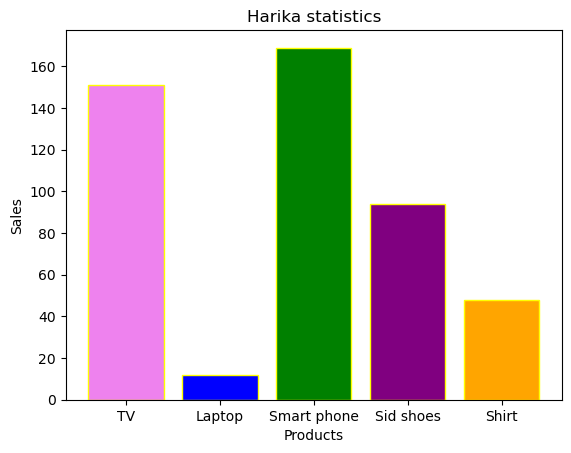

In [137]:
products=['TV','Laptop','Smart phone','Sid shoes','Shirt']
sales=np.random.randint(10,200,size=len(products))
plt.bar(products,sales,color=['violet','blue','green','purple','orange'],edgecolor='yellow')
plt.title('Harika statistics')
plt.xlabel('Products')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

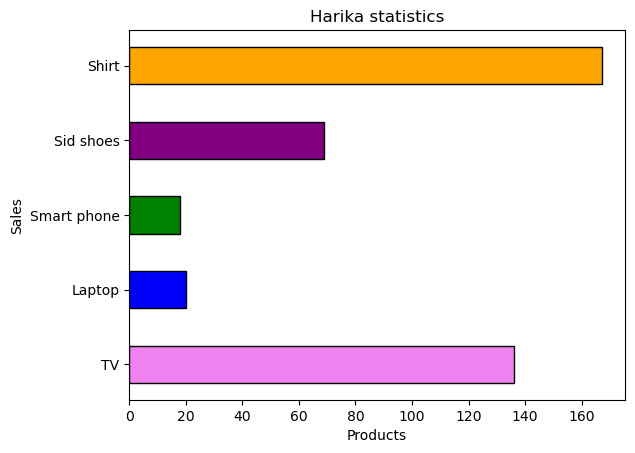

In [109]:
products=['TV','Laptop','Smart phone','Sid shoes','Shirt']
sales=np.random.randint(10,200,size=len(products))
plt.barh(products,sales,color=['violet','blue','green','purple','orange'],edgecolor='black',height=0.5)
plt.title('Harika statistics')
plt.xlabel('Products')
plt.ylabel('Sales')

([<matplotlib.patches.Wedge at 0x1e985df9bd0>,
 [Text(-0.23909845672751212, 1.124869738232175, 'Ram'),
  Text(-0.8546165829203798, 0.769500159972364, 'Shyam'),
  Text(-1.0937149671217454, -0.3553696254519787, 'Ravi'),
  Text(0.23909858837489292, -1.124869710249651, 'Satya'),
  Text(0.9959290977087496, 0.5750002020321701, 'Radhey')])

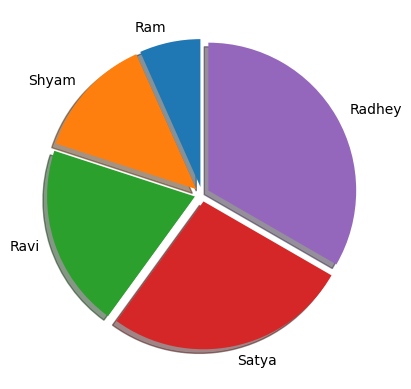

In [154]:
names=['Ram','Shyam','Ravi','Satya','Radhey']
slices=[0.05,0.05,0.05,0.05,0.05]
scores=[10,20,30,40,50]
plt.pie(scores,slices,labels=names,startangle=90,shadow=True)

<BarContainer object of 2 artists>

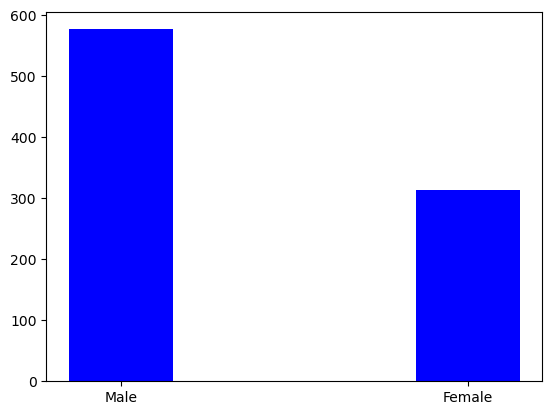

In [141]:
gender=['Male','Female']
male = (df_titanic['Sex']=='male').sum()
female = (df_titanic['Sex']=='female').sum()
count=[male,female]
plt.bar(gender,count,color='blue',width=0.3)

<BarContainer object of 2 artists>

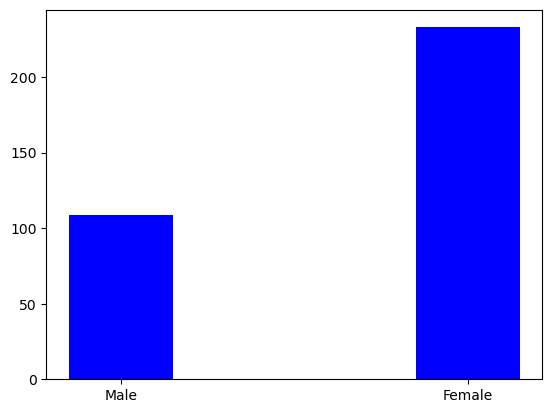

In [164]:
gender=['Male','Female']
male = ((df_titanic['Sex']=='male') &( df_titanic['Survived'])).sum()
female = ((df_titanic['Sex']=='female') & (df_titanic['Survived'])).sum()
count=[male,female]
plt.bar(gender,count,color='blue',width=0.3)

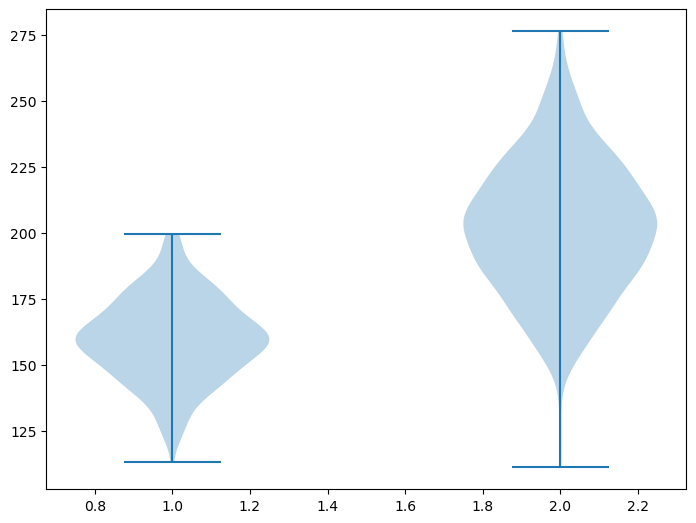

In [7]:
np.random.seed(8)
arr1=np.random.normal(160,15,321)
arr2=np.random.normal(200,25,550)
col=[arr1,arr2]
fig=plt.figure()
axes=fig.add_axes([0,0,1,1])
v=axes.violinplot(col)